In [2]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


datadir='/mnt/f/Tirocinio_HDD/Data/ADNI/UNIQUE_FILE.xlsx'
data=pd.read_excel(datadir)
data=data[data.columns[data.columns.isin(['ABETA','PTAU','TAU','A_COMPOSITE_SUVR','A_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR', 'A_NORM_CTX_ENTORHINAL_SUVR',
       'A_NORM_AMYGDALA_SUVR', 'A_NORM_HIPPOCAMPUS_SUVR', 'T_COMPOSITE_SUVR',
       'T_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR', 'T_NORM_CTX_ENTORHINAL_SUVR',
       'T_NORM_AMYGDALA_SUVR', 'T_NORM_HIPPOCAMPUS_SUVR', 'F_NORM_MEAN',
       'N_HIPPOCAMPUS_VOLUME', 'N_AMYGDALA_VOLUME', 'N_CTX_ENTORHINAL_VOLUME',
       'N_CTX_CAUDALMIDDLEFRONTAL_VOLUME'])]]

In [3]:
len(data.columns) #check 18

18

In [4]:
# preprocessing step, all -99 values set to 0
data[data < 0] = 0
data

,ABETA,TAU,PTAU,A_COMPOSITE_SUVR,A_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR,A_NORM_CTX_ENTORHINAL_SUVR,A_NORM_AMYGDALA_SUVR,A_NORM_HIPPOCAMPUS_SUVR,T_COMPOSITE_SUVR,T_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR,T_NORM_CTX_ENTORHINAL_SUVR,T_NORM_AMYGDALA_SUVR,T_NORM_HIPPOCAMPUS_SUVR,F_NORM_MEAN,N_HIPPOCAMPUS_VOLUME,N_AMYGDALA_VOLUME,N_CTX_ENTORHINAL_VOLUME,N_CTX_CAUDALMIDDLEFRONTAL_VOLUME
0,562.6,299.7,30.43,0.0000,0.000000,0.000000,0.000000,0.000000,1.329950,1.148381,1.409114,1.621943,1.351061,0.951459,0.001999,0.000832,0.001200,0.003219
1,688.9,394.0,40.35,1.8664,1.100889,0.613641,0.703225,0.666256,1.493576,1.308446,1.710615,1.790227,1.531171,1.042618,0.001760,0.000655,0.000469,0.003433
2,1286.0,186.9,14.14,1.8474,0.667858,0.642308,0.636949,0.639710,1.240267,1.079087,1.219323,1.296168,1.356808,1.144017,0.001863,0.001093,0.001091,0.004246
3,866.2,335.9,33.43,1.8596,1.236018,0.710368,0.825823,0.796569,1.634722,2.383952,1.466140,1.295301,1.307511,0.790032,0.002673,0.001198,0.001332,0.002352
4,599.9,319.6,31.80,1.5173,1.122191,0.696962,0.821196,0.716009,1.376690,1.174672,1.455197,1.685974,1.291726,1.111146,0.001984,0.000700,0.000865,0.003004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1422.0,231.5,19.86,0.0000,0.000000,0.000000,0.000000,0.000000,1.177743,1.071711,1.165383,1.240425,1.269879,1.444825,0.002522,0.000903,0.001250,0.004186
487,1307.0,176.4,15.17,0.0000,0.000000,0.000000,0.000000,0.000000,1.138416,1.025719,1.048725,1.305480,1.325122,0.000000,0.002492,0.001225,0.001259,0.004262
488,616.3,400.4,39.71,0.0000,0.000000,0.000000,0.000000,0.000000,1.140999,1.049048,1.143526,1.220449,1.185020,0.000000,0.002727,0.001033,0.001008,0.005010
489,1927.0,217.8,19.95,0.0000,0.000000,0.000000,0.000000,0.000000,1.102459,1.057882,1.018764,1.157956,1.202269,1.206199,0.003112,0.001050,0.001128,0.004469


For n_clusters = 3 The average silhouette_score is : 0.561990389030965
For n_clusters = 4 The average silhouette_score is : 0.5098728473077325
For n_clusters = 5 The average silhouette_score is : 0.5022739922788385
For n_clusters = 6 The average silhouette_score is : 0.44184405328556625


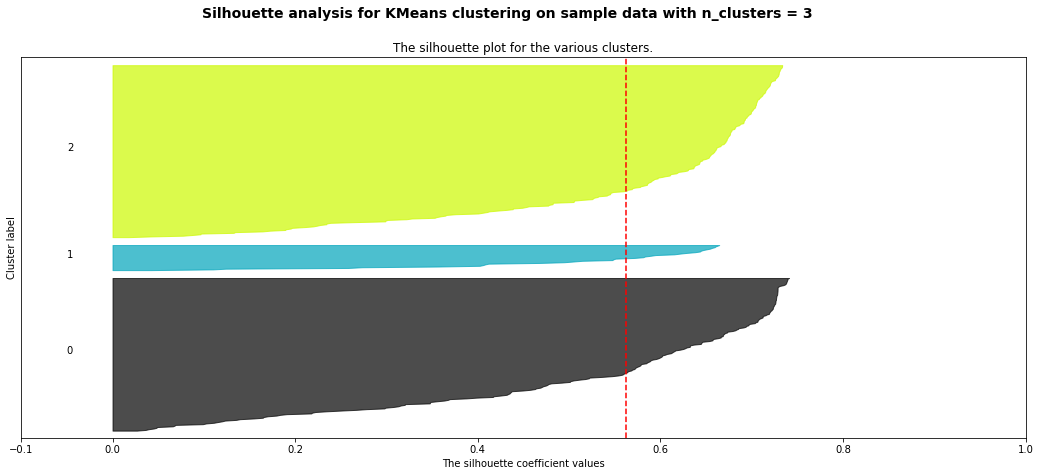

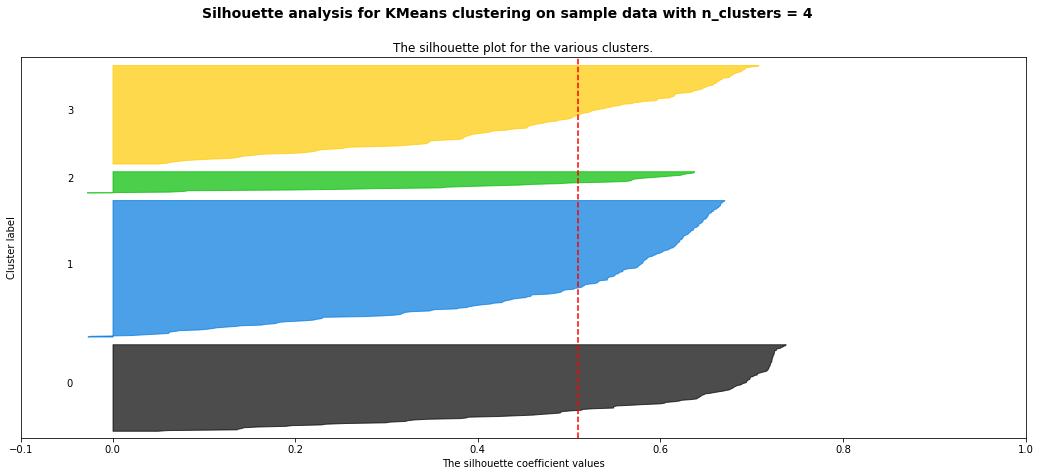

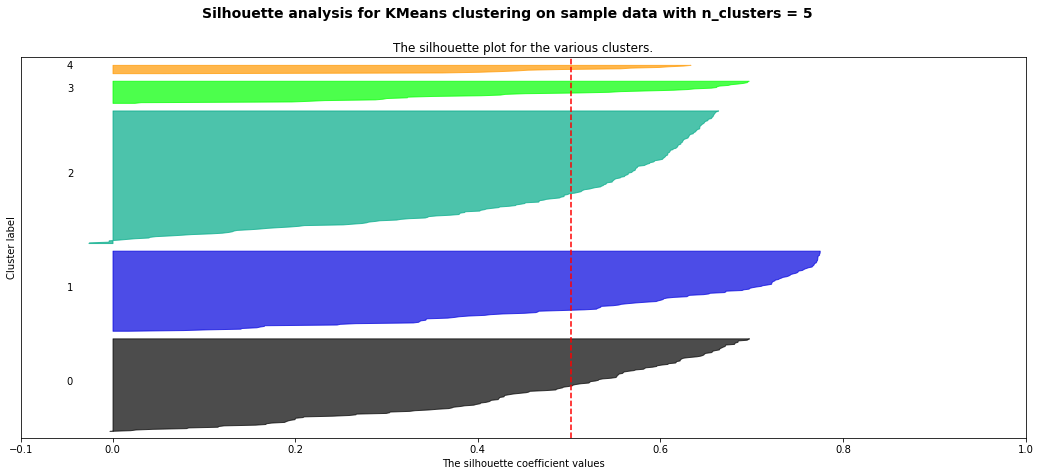

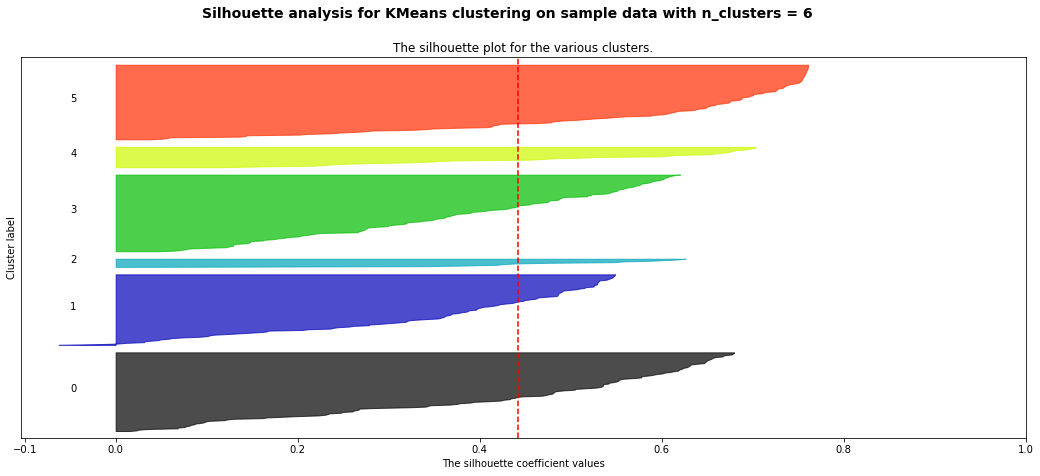

In [5]:
range_n_clusters = [3, 4, 5, 6]
X=data

for n_clusters in range_n_clusters:
 
    fig, (ax1) = plt.subplots(1,1 )
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])



    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=None).fit(X)
    cluster_labels=kmeans.labels_
    centers= kmeans.cluster_centers_
    
   # cluster_labels = KMeans(n_clusters=n_clusters, random_state=None).fit_predict(X) #equivalent to calling fit(X) and after predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


plt.savefig('My_silhouette.png')
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.561990389030965
For n_clusters = 4 The average silhouette_score is : 0.509446608454951
For n_clusters = 5 The average silhouette_score is : 0.4997108631472385
For n_clusters = 6 The average silhouette_score is : 0.4458196751431577


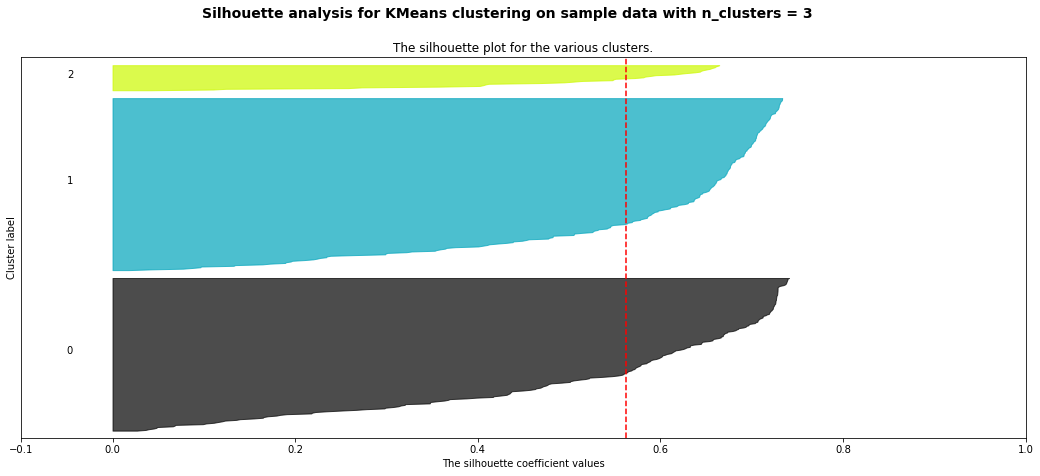

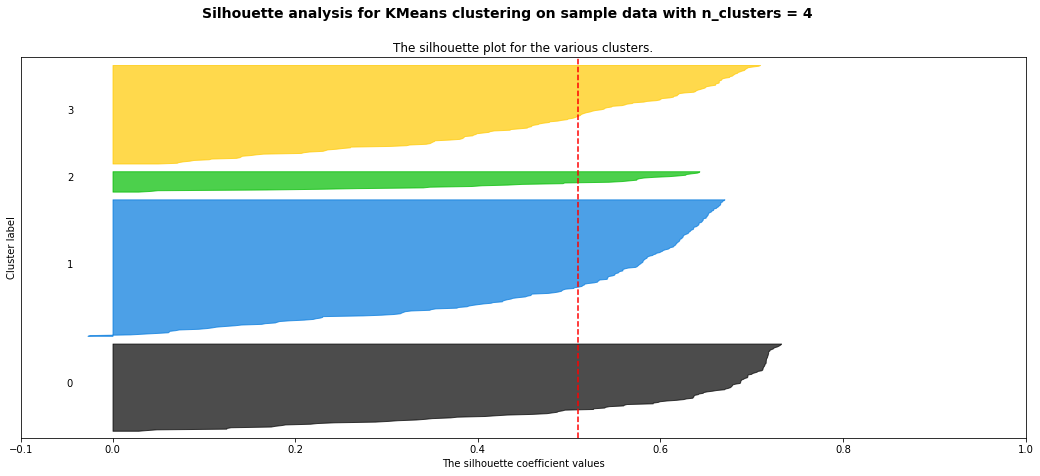

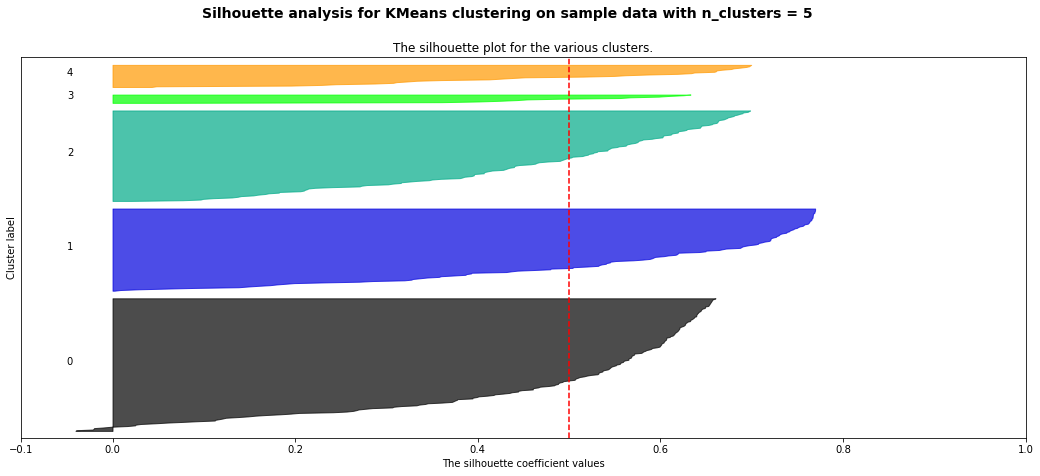

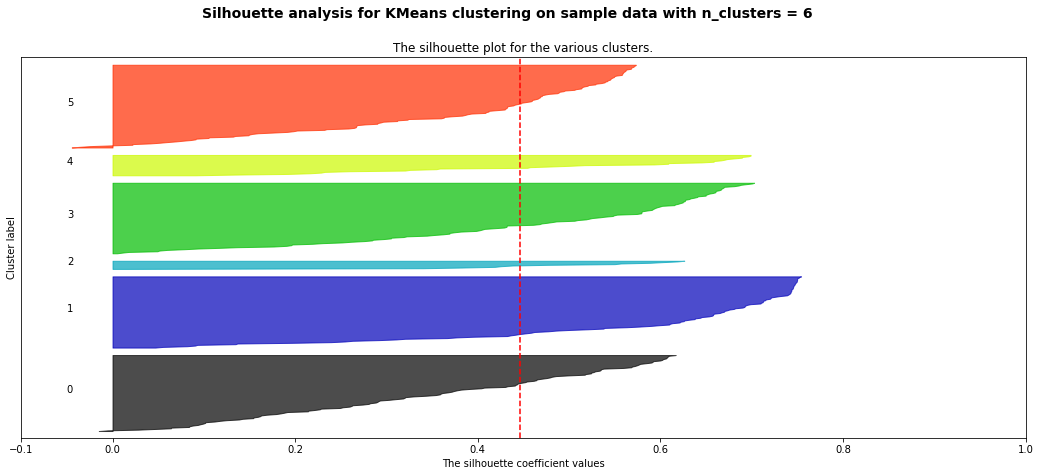

In [6]:
### MY IMPL

range_n_clusters = [3, 4, 5, 6]
X=data

for n_clusters in range_n_clusters:
 
    fig, (ax1) = plt.subplots(1,1 )
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])



    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #kmeans = KMeans(n_clusters=n_clusters, random_state=None).fit(X)
    #cluster_labels=kmeans.labels_
    #centers= kmeans.cluster_centers_
    
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=None).fit_predict(X) #equivalent to calling fit(X) and after predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


plt.savefig('SKlearn_silhpuette.png')
plt.show()

In [7]:
X

,ABETA,TAU,PTAU,A_COMPOSITE_SUVR,A_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR,A_NORM_CTX_ENTORHINAL_SUVR,A_NORM_AMYGDALA_SUVR,A_NORM_HIPPOCAMPUS_SUVR,T_COMPOSITE_SUVR,T_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR,T_NORM_CTX_ENTORHINAL_SUVR,T_NORM_AMYGDALA_SUVR,T_NORM_HIPPOCAMPUS_SUVR,F_NORM_MEAN,N_HIPPOCAMPUS_VOLUME,N_AMYGDALA_VOLUME,N_CTX_ENTORHINAL_VOLUME,N_CTX_CAUDALMIDDLEFRONTAL_VOLUME
0,562.6,299.7,30.43,0.0000,0.000000,0.000000,0.000000,0.000000,1.329950,1.148381,1.409114,1.621943,1.351061,0.951459,0.001999,0.000832,0.001200,0.003219
1,688.9,394.0,40.35,1.8664,1.100889,0.613641,0.703225,0.666256,1.493576,1.308446,1.710615,1.790227,1.531171,1.042618,0.001760,0.000655,0.000469,0.003433
2,1286.0,186.9,14.14,1.8474,0.667858,0.642308,0.636949,0.639710,1.240267,1.079087,1.219323,1.296168,1.356808,1.144017,0.001863,0.001093,0.001091,0.004246
3,866.2,335.9,33.43,1.8596,1.236018,0.710368,0.825823,0.796569,1.634722,2.383952,1.466140,1.295301,1.307511,0.790032,0.002673,0.001198,0.001332,0.002352
4,599.9,319.6,31.80,1.5173,1.122191,0.696962,0.821196,0.716009,1.376690,1.174672,1.455197,1.685974,1.291726,1.111146,0.001984,0.000700,0.000865,0.003004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1422.0,231.5,19.86,0.0000,0.000000,0.000000,0.000000,0.000000,1.177743,1.071711,1.165383,1.240425,1.269879,1.444825,0.002522,0.000903,0.001250,0.004186
487,1307.0,176.4,15.17,0.0000,0.000000,0.000000,0.000000,0.000000,1.138416,1.025719,1.048725,1.305480,1.325122,0.000000,0.002492,0.001225,0.001259,0.004262
488,616.3,400.4,39.71,0.0000,0.000000,0.000000,0.000000,0.000000,1.140999,1.049048,1.143526,1.220449,1.185020,0.000000,0.002727,0.001033,0.001008,0.005010
489,1927.0,217.8,19.95,0.0000,0.000000,0.000000,0.000000,0.000000,1.102459,1.057882,1.018764,1.157956,1.202269,1.206199,0.003112,0.001050,0.001128,0.004469


In [8]:
cluster_labels

array([3, 3, 0, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 4, 3, 1, 0, 2, 1, 4, 4, 4, 1, 0, 3, 3, 5, 4,
       1, 1, 4, 2, 3, 4, 0, 1, 4, 0, 1, 1, 4, 4, 1, 0, 1, 0, 3, 1, 4, 1,
       1, 4, 1, 4, 3, 1, 2, 4, 4, 0, 5, 1, 5, 4, 4, 0, 3, 4, 2, 3, 3, 1,
       3, 4, 1, 4, 4, 0, 4, 4, 3, 1, 0, 0, 3, 0, 4, 1, 0, 0, 3, 3, 3, 1,
       1, 0, 1, 3, 1, 4, 1, 2, 1, 5, 3, 4, 0, 1, 5, 1, 1, 4, 4, 1, 4, 3,
       1, 5, 0, 5, 4, 3, 1, 4, 0, 0, 3, 4, 0, 3, 3, 4, 0, 4, 4, 4, 0, 0,
       0, 3, 1, 1, 0, 4, 4, 1, 1, 1, 1, 0, 1, 4, 0, 4, 3, 4, 0, 5, 0, 3,
       4, 5, 4, 3, 4, 3, 2, 1, 3, 0, 4, 0, 0, 4, 0, 1, 1, 0, 0, 0, 3, 3,
       1, 4, 1, 0, 0, 4, 1, 4, 4, 3, 5, 2, 3, 4, 1, 3, 3, 5, 1, 0, 1, 0,
       0, 3, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 0, 4, 3, 1, 4, 4, 3, 4, 4, 4,
       5, 5, 0, 0, 3, 4, 3, 4, 1, 4, 3, 5, 0, 3, 5, 3, 1, 0, 5, 3, 4, 0,
       5, 0, 1, 3, 0, 0, 0, 4, 4, 1, 1, 5, 4, 3, 0, 3, 0, 4, 0, 1, 3, 1,
       1, 0, 0, 5, 4, 3, 3, 3, 4, 1, 5, 4, 3, 4, 3,

In [7]:
## KMEANS

## 4 Cluster
#X:{array-like, sparse matrix} of shape (n_samples, n_features)
kmeans = KMeans(n_clusters=4, random_state=None).fit(data)
kmeans2 = KMeans(n_clusters=4, random_state=None).fit_predict(data)
labels=kmeans.labels_
centers=kmeans.cluster_centers_  # saranno 4 in questo caso



In [8]:
labels

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 3, 2, 3, 3, 0, 1, 3, 2, 2, 2, 0, 0, 3, 3, 1, 2,
       0, 3, 2, 1, 3, 2, 0, 3, 2, 0, 3, 0, 2, 2, 0, 0, 3, 0, 3, 3, 2, 3,
       0, 2, 3, 2, 3, 3, 1, 2, 2, 0, 2, 3, 1, 2, 2, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 3, 2, 2, 0, 2, 2, 3, 0, 0, 0, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 2, 0, 1, 0, 2, 3, 2, 0, 3, 1, 0, 0, 2, 2, 3, 2, 3,
       3, 1, 0, 1, 2, 3, 3, 2, 0, 0, 3, 2, 0, 3, 3, 2, 0, 2, 2, 2, 0, 0,
       0, 3, 0, 0, 0, 2, 2, 3, 3, 3, 0, 0, 3, 2, 0, 2, 3, 2, 0, 1, 0, 3,
       2, 1, 2, 3, 2, 3, 1, 3, 3, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 3, 3,
       3, 2, 3, 0, 0, 2, 3, 2, 2, 3, 1, 1, 3, 2, 3, 3, 3, 1, 3, 0, 3, 0,
       0, 3, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 0, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       1, 2, 0, 0, 3, 2, 3, 2, 0, 2, 3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 2, 0,
       1, 0, 3, 3, 0, 0, 0, 2, 2, 3, 0, 2, 2, 3, 0, 3, 0, 2, 0, 3, 3, 3,
       3, 0, 0, 2, 2, 3, 3, 3, 2, 3, 1, 2, 3, 2, 3,

In [10]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [151]:
kmeans2

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 3, 2, 2, 0, 1, 2, 3, 3, 3, 0, 0, 2, 2, 1, 3,
       0, 2, 3, 1, 2, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 0, 2, 0, 2, 2, 3, 2,
       0, 3, 2, 3, 2, 2, 1, 3, 3, 0, 3, 2, 1, 3, 3, 0, 2, 3, 1, 2, 2, 2,
       2, 3, 2, 3, 3, 0, 3, 3, 2, 0, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 3, 0, 1, 0, 3, 2, 3, 0, 2, 1, 0, 2, 3, 3, 2, 3, 2,
       2, 1, 0, 1, 3, 2, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 0, 3, 3, 3, 0, 0,
       0, 2, 0, 0, 0, 3, 3, 2, 2, 2, 0, 0, 2, 3, 0, 3, 2, 3, 0, 1, 0, 2,
       3, 1, 3, 2, 3, 2, 1, 2, 2, 0, 3, 0, 0, 3, 0, 2, 0, 0, 0, 3, 2, 2,
       2, 3, 2, 0, 0, 3, 2, 3, 3, 2, 1, 1, 2, 3, 2, 2, 2, 1, 2, 0, 2, 0,
       0, 2, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 0, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       1, 3, 0, 0, 2, 3, 2, 3, 0, 3, 2, 3, 0, 2, 3, 2, 2, 0, 3, 2, 3, 0,
       1, 0, 2, 2, 0, 0, 0, 3, 3, 2, 0, 3, 3, 2, 0, 2, 0, 3, 0, 2, 2, 2,
       2, 0, 0, 3, 3, 2, 2, 2, 3, 2, 1, 3, 2, 3, 2,

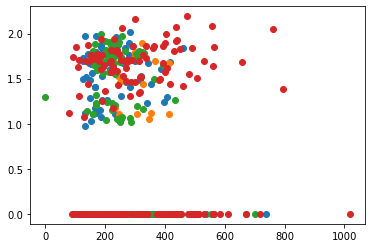

In [17]:
#filter rows of original data
filtered_label0 = data[kmeans2 == 0]
filtered_label1 = data[kmeans2 == 1]
filtered_label2 = data[kmeans2 == 2]
filtered_label3 = data[kmeans2 == 3]
#plotting the results
plt.scatter(filtered_label0.iloc[:,1] , filtered_label0.iloc[:,3])
plt.scatter(filtered_label1.iloc[:,1] , filtered_label1.iloc[:,3])
plt.scatter(filtered_label2.iloc[:,1] , filtered_label2.iloc[:,3])
plt.scatter(filtered_label3.iloc[:,1] , filtered_label3.iloc[:,3])

plt.show()

In [14]:
filtered_label0 

,ABETA,TAU,PTAU,A_COMPOSITE_SUVR,A_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR,A_NORM_CTX_ENTORHINAL_SUVR,A_NORM_AMYGDALA_SUVR,A_NORM_HIPPOCAMPUS_SUVR,T_COMPOSITE_SUVR,T_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR,T_NORM_CTX_ENTORHINAL_SUVR,T_NORM_AMYGDALA_SUVR,T_NORM_HIPPOCAMPUS_SUVR,F_NORM_MEAN,N_HIPPOCAMPUS_VOLUME,N_AMYGDALA_VOLUME,N_CTX_ENTORHINAL_VOLUME,N_CTX_CAUDALMIDDLEFRONTAL_VOLUME
2,1286.0,186.9,14.14,1.8474,0.667858,0.642308,0.636949,0.639710,1.240267,1.079087,1.219323,1.296168,1.356808,1.144017,0.001863,0.001093,0.001091,0.004246
6,1061.0,408.7,30.82,0.0000,0.000000,0.000000,0.000000,0.000000,1.190137,1.178318,1.248440,1.417345,1.428345,0.961923,0.001881,0.000761,0.000682,0.002396
11,1007.0,155.6,12.81,1.7893,0.669591,0.583748,0.636897,0.616051,1.026279,0.927557,1.062317,1.097182,1.040814,1.037125,0.001976,0.000804,0.000854,0.003119
22,969.9,319.9,27.86,1.5246,0.762036,0.492457,0.603306,0.670405,1.279337,1.101441,1.388155,1.486495,1.247399,1.024619,0.001458,0.000482,0.000460,0.003668
27,920.9,253.8,26.99,1.7361,1.138644,0.725534,0.916940,0.780888,1.242776,1.022840,1.486097,1.547766,1.319464,1.067018,0.001767,0.000802,0.001130,0.003781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,1047.0,343.7,32.73,1.6684,0.836790,0.589367,0.735735,0.821326,1.354811,1.111575,1.410990,1.636962,1.614083,0.000000,0.002764,0.001150,0.001199,0.003988
485,1095.0,176.6,13.91,1.7728,0.724334,0.609262,0.682367,0.769968,1.088345,0.989368,1.120393,1.030579,1.130518,0.000000,0.002841,0.001265,0.001136,0.004146
486,1422.0,231.5,19.86,0.0000,0.000000,0.000000,0.000000,0.000000,1.177743,1.071711,1.165383,1.240425,1.269879,1.444825,0.002522,0.000903,0.001250,0.004186
487,1307.0,176.4,15.17,0.0000,0.000000,0.000000,0.000000,0.000000,1.138416,1.025719,1.048725,1.305480,1.325122,0.000000,0.002492,0.001225,0.001259,0.004262


In [ ]:
## 4 Cluster v2
sample_df_train, sample_df_test = sklearn.model_selection.train_test_split(data, train_size=0.6) #train_size-> % da usare per fare il training

cluster = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(sample_df_train)
result = cluster.predict(sample_df_test)

In [93]:
centers

array([[1.19075603e+03, 2.26729787e+02, 2.02304255e+01, 7.61209929e-01,
        4.29216276e-01, 3.51931989e-01, 3.90258323e-01, 4.19270739e-01,
        1.01632505e+00, 9.10508849e-01, 1.01776309e+00, 1.09006846e+00,
        1.10251410e+00, 7.58961730e-01, 2.40134462e-03, 1.00458839e-03,
        1.15420070e-03, 3.73284144e-03],
       [2.74806452e+03, 3.01935484e+02, 2.58319355e+01, 8.62387097e-01,
        5.00072895e-01, 4.22270698e-01, 4.65885292e-01, 4.98279696e-01,
        1.04036486e+00, 9.58085961e-01, 1.03773612e+00, 1.09126372e+00,
        1.10074450e+00, 6.68516474e-01, 2.53990319e-03, 1.05179813e-03,
        1.26070105e-03, 3.93257368e-03],
       [1.74174194e+03, 2.39641129e+02, 2.10126613e+01, 7.13312097e-01,
        4.02517569e-01, 3.46581561e-01, 3.83013770e-01, 4.16928242e-01,
        9.97761663e-01, 9.05724345e-01, 9.81372917e-01, 1.04696718e+00,
        1.07726961e+00, 9.49510018e-01, 2.52875476e-03, 1.05973819e-03,
        1.23233646e-03, 3.76509824e-03],
       [6.302

In [109]:
centers.shape


(4, 18)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [24]:
v = np.arange(12).reshape(-1, 3)
v

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [25]:
v[:, 1]


array([ 1,  4,  7, 10])

In [ ]:
## KMEANS

## 3 Cluster

In [18]:

data=pd.read_excel(datadir)
data=data[data.columns[data.columns.isin(['AGE','ABETA','PTAU','TAU','A_COMPOSITE_SUVR','A_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR', 'A_NORM_CTX_ENTORHINAL_SUVR',
       'A_NORM_AMYGDALA_SUVR', 'A_NORM_HIPPOCAMPUS_SUVR', 'T_COMPOSITE_SUVR',
       'T_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR', 'T_NORM_CTX_ENTORHINAL_SUVR',
       'T_NORM_AMYGDALA_SUVR', 'T_NORM_HIPPOCAMPUS_SUVR', 'F_NORM_MEAN',
       'N_HIPPOCAMPUS_VOLUME', 'N_AMYGDALA_VOLUME', 'N_CTX_ENTORHINAL_VOLUME',
       'N_CTX_CAUDALMIDDLEFRONTAL_VOLUME'])]]

#X:{array-like, sparse matrix} of shape (n_samples, n_features)
kmeans = KMeans(n_clusters=4, random_state=None).fit(data)
kmeans2 = KMeans(n_clusters=4, random_state=None).fit_predict(data)
labels=kmeans.labels_
centers=kmeans.cluster_centers_  # saranno 4 in questo caso

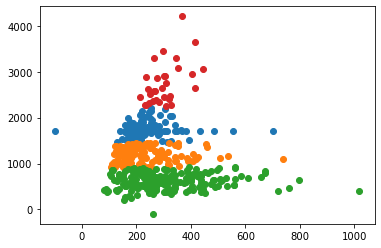

In [21]:
#filter rows of original data
filtered_label0 = data[kmeans2 == 0]
filtered_label1 = data[kmeans2 == 1]
filtered_label2 = data[kmeans2 == 2]
filtered_label3 = data[kmeans2 == 3]

#plotting the results
plt.scatter(filtered_label0.iloc[:,2] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,2] , filtered_label1.iloc[:,1])
plt.scatter(filtered_label2.iloc[:,2] , filtered_label2.iloc[:,1])
plt.scatter(filtered_label3.iloc[:,2] , filtered_label3.iloc[:,1])


plt.show()

In [20]:
filtered_label0

,AGE,ABETA,TAU,PTAU,A_COMPOSITE_SUVR,A_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR,A_NORM_CTX_ENTORHINAL_SUVR,A_NORM_AMYGDALA_SUVR,A_NORM_HIPPOCAMPUS_SUVR,T_COMPOSITE_SUVR,T_NORM_CTX_CAUDALMIDDLEFRONTAL_SUVR,T_NORM_CTX_ENTORHINAL_SUVR,T_NORM_AMYGDALA_SUVR,T_NORM_HIPPOCAMPUS_SUVR,F_NORM_MEAN,N_HIPPOCAMPUS_VOLUME,N_AMYGDALA_VOLUME,N_CTX_ENTORHINAL_VOLUME,N_CTX_CAUDALMIDDLEFRONTAL_VOLUME
29,72.4,1700.0,179.6,15.40,-99.0000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.331760,0.002505,0.000944,0.001186,0.003505
35,88.9,1700.0,252.4,21.72,1.0524,0.956754,0.903808,0.973345,1.102811,1.203154,1.050028,1.228666,1.325291,1.267737,1.453776,0.002390,0.000962,0.001332,0.003366
36,72.0,1700.0,248.7,20.22,-99.0000,-99.000000,-99.000000,-99.000000,-99.000000,1.013713,0.912505,1.055567,1.042468,1.069484,1.227213,0.002258,0.000973,0.001149,0.003522
37,75.8,1696.0,174.3,15.26,-99.0000,-99.000000,-99.000000,-99.000000,-99.000000,1.165273,1.048876,1.167389,1.203265,1.220800,1.367625,0.002626,0.001064,0.001234,0.003857
43,73.9,1816.0,281.2,26.50,-99.0000,-99.000000,-99.000000,-99.000000,-99.000000,1.116721,1.041041,1.090900,1.198803,1.215073,1.269419,0.002589,0.001162,0.001370,0.005232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,76.7,1700.0,366.3,33.07,-99.0000,-99.000000,-99.000000,-99.000000,-99.000000,1.208312,1.110108,1.196408,1.309389,1.333504,1.196915,0.002727,0.001046,0.001353,0.003826
472,74.7,1569.0,216.6,18.20,1.7420,0.763146,0.608668,0.729851,0.762629,1.113912,0.991746,1.065928,1.164455,1.208965,-99.000000,0.002523,0.000974,0.001309,0.003112
480,69.7,1472.0,311.2,28.56,1.7242,0.849089,0.554286,0.728106,0.728802,1.266913,1.202144,1.199954,1.402558,1.389651,-99.000000,0.002367,0.001161,0.001427,0.003482
484,75.3,1728.0,198.2,17.36,1.9138,0.648448,0.625666,0.684763,0.751019,1.158614,1.020280,1.166816,1.242569,1.249727,-99.000000,0.002043,0.000994,0.001160,0.004015


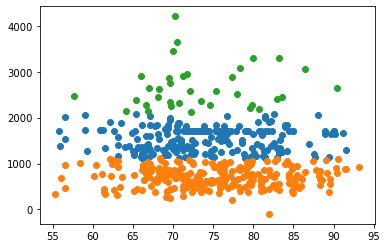

In [14]:
#filter rows of original data
filtered_label0 = data[labels == 0]
filtered_label1 = data[labels == 1]
filtered_label2 = data[labels == 2]

#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1])
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1])


plt.show()

In [16]:
centers

array([[ 7.40271028e+01,  1.52634579e+03,  2.30432710e+02,
         1.98356542e+01, -5.15498168e+01, -5.18645363e+01,
        -5.19269852e+01, -5.18902771e+01, -5.18552062e+01,
        -1.19582660e+01, -1.20550928e+01, -1.19690451e+01,
        -1.19032391e+01, -1.18782040e+01, -2.96503063e+01,
         2.47560387e-03,  1.03705373e-03,  1.20367364e-03,
         3.77005281e-03],
       [ 7.52078838e+01,  7.02228631e+02,  2.96398672e+02,
         2.74690041e+01, -5.43099635e+01, -5.45635459e+01,
        -5.46929829e+01, -5.46565839e+01, -5.46530652e+01,
        -6.63074854e+00, -6.73693149e+00, -6.58880615e+00,
        -6.51535433e+00, -6.56992677e+00, -2.70808443e+01,
        -4.08472281e-01, -4.09836058e-01, -4.09668579e-01,
        -4.07169260e-01],
       [ 7.33750000e+01,  2.66633333e+03,  2.95444444e+02,
         2.53088889e+01, -3.75554056e+01, -3.79895666e+01,
        -3.80666958e+01, -3.80226703e+01, -3.79854415e+01,
        -9.97155242e+00, -1.00553515e+01, -9.97304341e+00,
    

In [26]:
centers[:,1]

array([1526.34579439,  702.22863071, 2666.33333333])

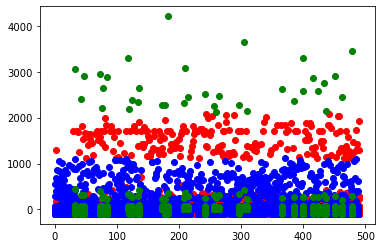

In [45]:
plt.plot(data[labels==0] ,'ro')
plt.plot(data[labels==1] ,'bo')
plt.plot(data[labels==2] ,'go')
plt.show()

In [55]:
#Transform the data

#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data)

In [56]:
label

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1,
       0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0,
       1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1,
       2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0,

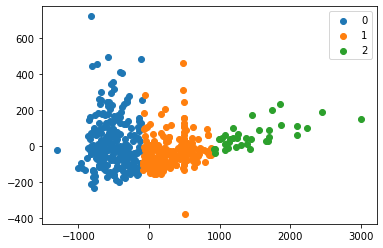

In [57]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()